In [1]:
#Importing the required libraries

from qutip import *
import numpy as np
from scipy import integrate
from helper_code_qutip import * 
import scipy.io

In [3]:
## Importing the data from the .mat file

matlab_data1 = scipy.io.loadmat('../matlab/data_plotting_vsbeta_1/data_2_2_5.mat',mat_dtype=False)
matlab_data2 = scipy.io.loadmat('../matlab/data_plotting_vsbeta_1/data_2_2_6.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..

In [4]:
## Processing to see whether the data is extracted correctly or not

betalist1 = matlab_data1['betalist'][0]
betalist2 = matlab_data2['betalist'][0]

gamma_matrices1 = matlab_data1['gamma_matrices'][0]
ls_matrices1 = matlab_data1['lamb_shift_matrices'][0]

gamma_matrices2 = matlab_data2['gamma_matrices'][0]
ls_matrices2 = matlab_data2['lamb_shift_matrices'][0]

NL = int(matlab_data1["NL"][0,0])
NM = int(matlab_data2["NM"][0,0])

print('NL and NM are ', NL, NM, 'respectively')

N = NL + NM
dL = 2**NL
dM = 2**NM
d = 2**N
dims = [2]*N

NL and NM are  2 2 respectively


In [5]:
print(gamma_matrices2.shape)
print(ls_matrices2.shape)

#print(gamma_matrices2[1])
print(betalist1)
print(betalist2)

(15,)
(15,)
[1000.            5.55555556    5.        ]
[1.00000000e+03 1.74716086e+00 8.74344242e-01 5.83066095e-01
 4.37363324e-01 3.49921268e-01 2.91618064e-01 2.49968754e-01
 2.18729494e-01 1.94430942e-01 1.74991250e-01 1.59085486e-01
 1.45830295e-01 1.34614090e-01 1.25000000e-01]


In [6]:
def matrix_transform(gamma_matrix,ls_matrix):
    gamma_matr = np.zeros((dL**2-1,dL**2-1), dtype = complex)
    ls_matr = np.zeros((dL,dL), dtype = complex)

    for i in range(dL**2-1):
        for j in range(dL**2-1):
            gamma_matr[i,j] = gamma_matrix[i,j]

    for i in range(dL):
        for j in range(dL):
            ls_matr[i,j] = ls_matrix[i,j]

    return gamma_matr, ls_matr


fin_gamma_matrices1 = [0]*len(betalist1)
fin_ls_matrices1 = [0]*len(betalist1)

fin_gamma_matrices2 = [0]*len(betalist2)
fin_ls_matrices2 = [0]*len(betalist2)

for i in range(len(betalist1)):
    fin_gamma_matrices1[i], fin_ls_matrices1[i] = matrix_transform(gamma_matrices1[i],ls_matrices1[i])

for i in range(len(betalist2)):
    fin_gamma_matrices2[i], fin_ls_matrices2[i] = matrix_transform(gamma_matrices2[i],ls_matrices2[i])





In [9]:
matlab_data3 = scipy.io.loadmat('../matlab/thermal_data1.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..
matlab_data4 = scipy.io.loadmat('../matlab/thermal_data3.mat',mat_dtype=False)  # is set to True, givex complex casting to real errors..

In [10]:
matlab_F_list1 = matlab_data3["F"]
F_list1 = []

matlab_F_list2 = matlab_data4["F"]
F_list2 = []


for index in range(2**dL):
    matrix1 = np.asmatrix(matlab_F_list1[0,index])
    matrix2 = np.asmatrix(matlab_F_list2[0,index])

    F_list1.append(Qobj(matrix1))
    F_list2.append(Qobj(matrix2))
    
if not basis_is_orthonormal(F_list1):
    print("WARNING : Basis 1 is NOT orthonormal")

if not basis_is_orthonormal(F_list2):
    print("WARNING : Basis 2 is NOT orthonormal")

F_list1.pop() #removes the last indentity basis ..
print(F_list2[-1]) # should be identity matrix
F_list2.pop()

for index in range(2**dL-1):
    F_list1[index].dims = [dims,dims] # makes sure mutliplication will work and QuTiP wont throw errors. 
    F_list2[index].dims = [dims,dims]

Quantum object: dims=[[16], [16]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.

In [11]:
w0list = matlab_data2["w0list"][:,0]
w0list = w0list.astype('float')
print('w0list is ', w0list)

glist = matlab_data1["glist"][:,0]
glist = glist.astype('float')

print('glist is', glist)

H_S = create_hamiltonian2(w0list,glist,N)
eigenenergies, eigenstates = H_S.eigenstates()

w0list is  [1. 1. 1. 1.]
glist is [0.0016 0.0016 0.0016]


In [12]:
p_c= 1e-2
p_h= 1.1e-3

In [14]:
def steady_state_calc(beta1, beta2, gamma_matrix1, gamma_matrix2, ls_matrix1, ls_matrix2):

    
    [D1,U1] = np.linalg.eigh(gamma_matrix1)
    [D2,U2] = np.linalg.eigh(gamma_matrix2)

    L_list1 = []
    Udagger1 = np.transpose(np.conj(U1))
    L_list2 = []
    Udagger2 = np.transpose(np.conj(U2))

    for j  in range(dL**2-1):
        op1 = 0
        op2 = 0
        for betaindex in range(dL**2-1):    
            op1 = op1+Udagger1[j,betaindex]* F_list1[betaindex]
            op2 = op2+Udagger2[j,betaindex]* F_list2[betaindex]
        L_list1.append(op1)
        L_list2.append(op2)

    tildeL_list1 = []
    tildeL_list2 = []

    for index in range(dL**2-1):
        tildeL_list1.append(np.sqrt(p_c*D1[index])*L_list1[index])
        tildeL_list2.append(np.sqrt(p_h*D2[index])*L_list2[index])

    tildeL_list = []
    for i in tildeL_list1:
        tildeL_list.append(i)

    for i in tildeL_list2:
        tildeL_list.append(i)

    H_LS1 = tensor(Qobj(ls_matrix1),qeye(dM))
    H_LS2 = tensor(qeye(dM),Qobj(ls_matrix2))
    H_LS1.dims = [dims,dims]
    H_LS2.dims = [dims,dims]
    rho_ss = steadystate(H_S + p_c*H_LS1 + p_h*H_LS2, tildeL_list)
    L_operator = liouvillian(H_S+H_LS1+H_LS2, tildeL_list)

    L_eigen = L_operator.eigenenergies()

    print("Smallest eigenvalues for Tc = ", 1/beta1, "and Th = ", 1/beta2, "are ",L_eigen[-3:])

    return rho_ss


In [15]:
rho_fin_arr = []
for i in range(len(betalist1)):
    list1 = []
    for j in range(len(betalist2)):
        rho_fin = steady_state_calc(betalist1[i], betalist2[j], fin_gamma_matrices1[i], fin_gamma_matrices2[j], fin_ls_matrices1[i], fin_ls_matrices2[j])
        list1.append(rho_fin)
    rho_fin_arr.append(list1)

Smallest eigenvalues for Tc =  0.001 and Th =  0.001 are  [-2.89062481e-04+1.00255943e+00j -8.15744328e-05+5.90341777e-17j
  1.41699361e-16-1.21048942e-17j]
Smallest eigenvalues for Tc =  0.001 and Th =  0.5723571428571428 are  [-2.83068099e-04-9.97441767e-01j -8.20007980e-05+1.21461290e-17j
  5.32348030e-17-7.50750713e-17j]
Smallest eigenvalues for Tc =  0.001 and Th =  1.1437142857142855 are  [-2.79614255e-04-1.52883767e-16j -7.51925693e-05-1.42062665e-17j
 -1.56428074e-16+1.65391834e-16j]
Smallest eigenvalues for Tc =  0.001 and Th =  1.7150714285714284 are  [-3.10609670e-04+9.97442559e-01j -1.03494108e-04-2.71560996e-17j
  1.31399175e-16-6.77584016e-17j]
Smallest eigenvalues for Tc =  0.001 and Th =  2.286428571428571 are  [-2.92782627e-04-2.15803218e-17j -8.46952163e-05+1.46318131e-16j
  1.11398390e-16-1.21840513e-16j]
Smallest eigenvalues for Tc =  0.001 and Th =  2.857785714285714 are  [-2.98396495e-04-9.97440913e-01j -8.90459093e-05+8.94059029e-18j
 -9.91849847e-18-1.32670450e-

In [16]:
rho_fin_arr[0][0]

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 2.14781513e-11+0.00000000e+00j -5.29300942e-34+2.95671464e-31j
  -3.05718687e-31-7.87704135e-33j -8.52088357e-33-6.05886848e-31j
   2.68007267e-33-3.47063319e-30j -3.59723108e-32+4.66547037e-32j
  -2.14183718e-33+2.82307931e-31j -2.76629089e-34-6.47893287e-36j
   1.64721931e-31-4.32168064e-33j -1.32635146e-32-8.58612852e-32j
  -4.43345746e-32+4.49091223e-34j -3.42121096e-36-1.19940161e-32j
   1.23503517e-32-1.20561346e-30j -1.28144973e-32-1.45610476e-35j
  -4.71421829e-36-1.04017266e-32j  2.23646655e-37-1.54764852e-33j]
 [-5.29300942e-34-2.95671464e-31j  3.57357713e-11+0.00000000e+00j
  -7.88317605e-24+2.41300536e-12j -1.40811504e-30-2.23081321e-32j
   4.82674319e-13-3.96716514e-25j  7.47995777e-33-7.85210048e-30j
   4.93109074e-31+1.98922167e-33j  2.96653946e-32+2.21197994e-32j
   2.10617014e-24+2.02546364e-12j  4.14463235e-31-3.98376329e-33j
  -3.81587166e-34+2.1224

In [17]:
reduced_dm_list = []

for i in range(len(betalist1)):
    list2 = []
    for j in range(len(betalist2)):
        reduced_dm = ptrace(rho_fin_arr[i][j],[2,3])
        list2.append(reduced_dm)
    reduced_dm_list.append(list2)

In [18]:
def concurrence2(rho):
    if rho.type == 'ket':
        rho = ket2dm(rho)
    if rho.type != 'oper':
        raise TypeError("Input must be a density matrix or ket")
    
    rho_tilde = tensor(sigmay(),sigmay())*(rho.conj())*tensor(sigmay(),sigmay())
    R = (rho.sqrtm()*rho_tilde*rho.sqrtm()).sqrtm()
    evals = R.eigenenergies()
    evals = np.sort(np.real(evals))
    print(evals) #testing
    val = evals[-1] - evals[-2] - evals[-3] - evals[-4]
    return np.max([0,val])

In [19]:
###test concurrence2
test_rho = reduced_dm_list[0][2]

print(test_rho.eigenenergies())

print(concurrence2(test_rho))

[0.0023089  0.00621897 0.00763174 0.98384038]
[0.0062507  0.00759301 0.04766122 0.04766122]
0.0


In [20]:
## Now we can calculate concurrence, purity, etc.

Th_list = np.linspace(0.001,8,15)
Tc_list = [0.001,0.18,0.20]  #Not using values zero exatcly because of numerical issues

g= 1.6e-3  #Using values given in the paper

def concurrence_plot(Th_list,Tc_list,reduced_dm_list):
    for i in range(len(Tc_list)):
        concurrence_list = []
        for j in range(len(Th_list)):
            concurrence_list.append(concurrence(reduced_dm_list[i][j]))
            print(f'Concurrence Qutip for Tc = {Tc_list[i]} and Th = {round(Th_list[j],2)}: ',concurrence(reduced_dm_list[i][j]))
            concurrence2(reduced_dm_list[i][j])
        plt.plot(Th_list,concurrence_list,label='Tc/E = '+str(Tc_list[i]))

    plt.xlabel('Thermal bath temperature (T_h/E)')
    plt.ylabel('Concurrence')
    plt.title(f'Concurrence vs Th for different Tc at g = {g}, pc = {p_c}, ph = {p_h}')
    plt.legend()


Concurrence Qutip for Tc = 0.001 and Th = 0.0:  0
[4.73340395e-10 4.78983809e-10 1.48248831e-05 1.48248831e-05]
Concurrence Qutip for Tc = 0.001 and Th = 0.57:  0
[0.01339557 0.01621323 0.06809704 0.06809704]
Concurrence Qutip for Tc = 0.001 and Th = 1.14:  0
[0.0062507  0.00759301 0.04766122 0.04766122]
Concurrence Qutip for Tc = 0.001 and Th = 1.72:  0
[0.06199784 0.07638597 0.14510249 0.14510249]
Concurrence Qutip for Tc = 0.001 and Th = 2.29:  0
[0.03105249 0.03796905 0.10505013 0.10505013]
Concurrence Qutip for Tc = 0.001 and Th = 2.86:  0
[0.04127546 0.05064354 0.12072152 0.12072152]
Concurrence Qutip for Tc = 0.001 and Th = 3.43:  0
[0.06805773 0.08434163 0.153449   0.153449  ]
Concurrence Qutip for Tc = 0.001 and Th = 4.0:  0
[0.05299846 0.0653292  0.13644327 0.13644327]
Concurrence Qutip for Tc = 0.001 and Th = 4.57:  0
[0.07590531 0.09446492 0.1620127  0.1620127 ]
Concurrence Qutip for Tc = 0.001 and Th = 5.14:  0
[0.07540762 0.09385164 0.16166259 0.16166259]
Concurrence Quti

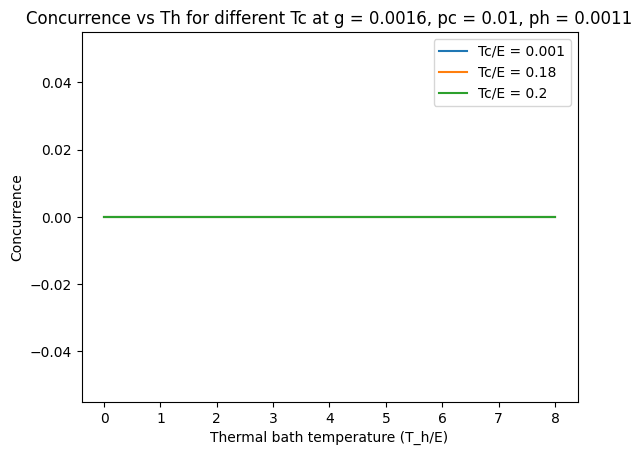

In [21]:
concurrence_plot(Th_list,Tc_list,reduced_dm_list)

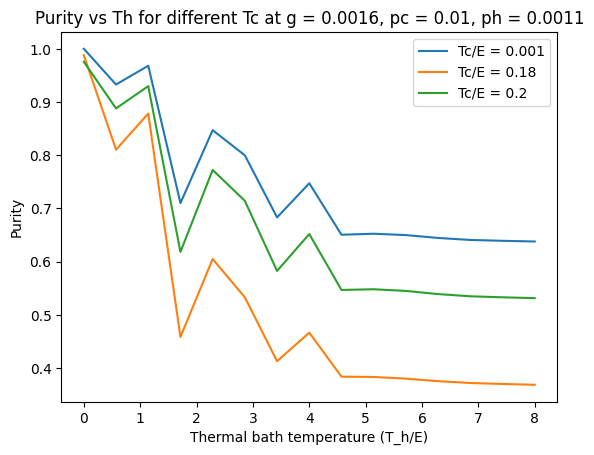

In [22]:
def purity_plot(Th_list,Tc_list,reduced_dm_list):
    for i in range(len(Tc_list)):
        purity_list = []
        for j in range(len(Th_list)):
            purity_list.append(reduced_dm_list[i][j].purity())
        plt.plot(Th_list,purity_list,label='Tc/E = '+str(Tc_list[i]))

    plt.xlabel('Thermal bath temperature (T_h/E)')
    plt.ylabel('Purity')
    plt.title(f'Purity vs Th for different Tc at g = {g}, pc = {p_c}, ph = {p_h}')
    plt.legend()

purity_plot(Th_list,Tc_list,reduced_dm_list)

In [23]:
def thermal_c(E,T_c):
    r_c = 1/(1+np.exp(-E/T_c))
    t_c = r_c*fock_dm(2,1) + (1-r_c)*fock_dm(2,0)

    return t_c

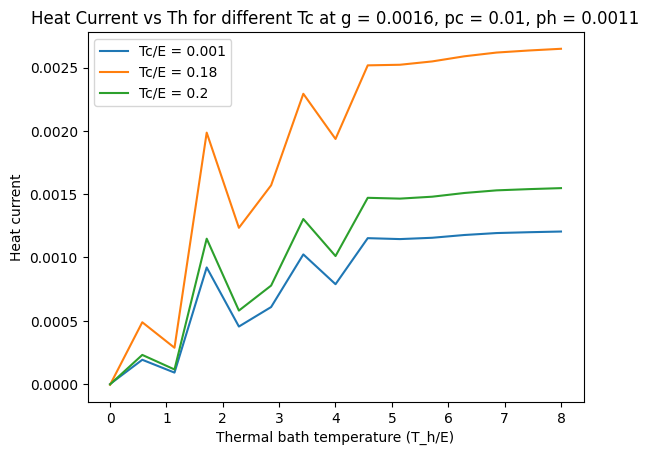

In [24]:
def heat_current(Th_list,Tc_list,reduced_dm_list):
    for i in range(len(Tc_list)):
        heat_curr_list = []
        for j in range(len(Th_list)):
            ss = reduced_dm_list[i][j]
            rho_c = ss.ptrace(0)
            thermal_cold = thermal_c(1.0,Tc_list[i])

            heat_curr = p_c*(fock(2,0).dag()*(rho_c - thermal_cold)*fock(2,0))  #as |0> is the excited state

            heat_curr_list.append(heat_curr.real)
        plt.plot(Th_list,heat_curr_list,label='Tc/E = '+str(Tc_list[i]))
    
    plt.xlabel('Thermal bath temperature (T_h/E)')
    plt.ylabel('Heat current')
    plt.title(f'Heat Current vs Th for different Tc at g = {g}, pc = {p_c}, ph = {p_h}')
    plt.legend()

heat_current(Th_list,Tc_list,reduced_dm_list)

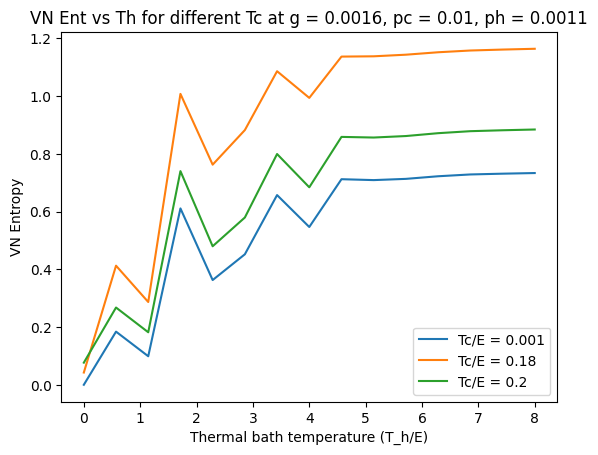

In [25]:
def vn_plot(Th_list,Tc_list,reduced_dm_list):
    for i in range(len(Tc_list)):
        concurrence_list = []
        for j in range(len(Th_list)):
            concurrence_list.append(entropy_vn(reduced_dm_list[i][j]))
        plt.plot(Th_list,concurrence_list,label='Tc/E = '+str(Tc_list[i]))

    plt.xlabel('Thermal bath temperature (T_h/E)')
    plt.ylabel('VN Entropy')
    plt.title(f'VN Ent vs Th for different Tc at g = {g}, pc = {p_c}, ph = {p_h}')
    plt.legend()

vn_plot(Th_list,Tc_list,reduced_dm_list)

In [26]:
## Let us also calculate negativity

def negativity(rho):
    rho_pt1 = partial_transpose(rho,[1,0])
    rho_pt2 = partial_transpose(rho,[0,1])

    neg1 = 0.5*(rho_pt1.norm()-1)
    neg2 = 0.5*(rho_pt2.norm()-1)

    return (neg1,neg2)




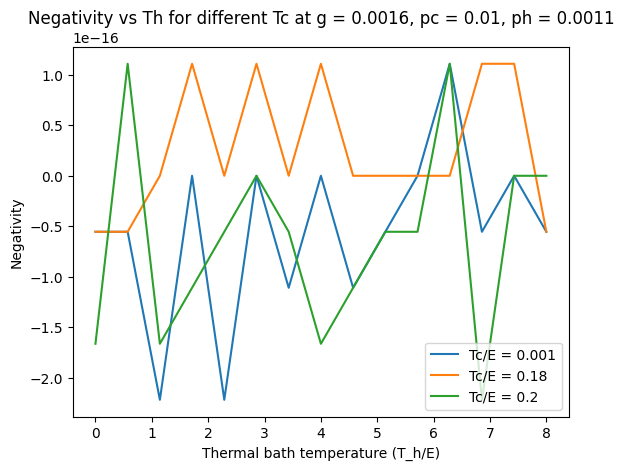

In [27]:
def neg_plot(Th_list,Tc_list,reduced_dm_list):
    for i in range(len(Tc_list)):
        neg_list1 = []
        neg_list2 = []
        for j in range(len(Th_list)):
            neg1,neg2 = negativity(reduced_dm_list[i][j])
            neg_list1.append(neg1)
            neg_list2.append(neg2)
        plt.plot(Th_list,neg_list1,'-',label='Tc/E = '+str(Tc_list[i]))
        #plt.plot(Th_list,neg_list1,'--',label='Tc/E = '+str(Tc_list[i]))

    plt.xlabel('Thermal bath temperature (T_h/E)')
    plt.ylabel('Negativity')
    plt.title(f'Negativity vs Th for different Tc at g = {g}, pc = {p_c}, ph = {p_h}')
    plt.legend()

neg_plot(Th_list,Tc_list,reduced_dm_list)

## Based on Concurrence and negativity, it seems that there is no Entanglement in this scenario

In [24]:
print(reduced_dm_list[0][1].eigenenergies())

[0.00602404 0.02602584 0.02700044 0.94094969]
